In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
#read the date from the data
df_act = pd.read_csv('C:/Users/salizadeh/OneDrive/Documents/Sara/GitHub/Repo/Datasets/RedHat_Business_Value/act_train.csv', parse_dates=['date'])
df_ppl = pd.read_csv('C:/Users/salizadeh/OneDrive/Documents/Sara/GitHub/Repo/Datasets/RedHat_Business_Value/people.csv', parse_dates=['date'])
df_act_test = pd.read_csv('C:/Users/salizadeh/OneDrive/Documents/Sara/GitHub/Repo/Datasets/RedHat_Business_Value/act_test.csv', parse_dates=['date'])

__Data Description__

<br>There are two separate data files: a people file and an activity file.

<br>The people file contains all of the unique people (and the corresponding characteristics) that have performed activities over time. Each row in the people file represents a unique person. Each person has a unique people_id.

<br>The activity file contains all of the unique activities (and the corresponding activity characteristics) that each person has performed over time. Each row in the activity file represents a unique activity performed by a person on a certain date. Each activity has a unique activity_id.The activity file contains several different categories of activities. Type 1 activities are different from type 2-7 activities because there are more known characteristics associated with type 1 activities (nine in total) than type 2-7 activities (which have only one associated characteristic).

<br> This project is to predict the potential business value of a person who has performed a specific activity. The business value outcome is defined by a yes/no field attached to each unique activity in the activity file. The outcome field indicates whether or not each person has completed the outcome within a fixed window of time after each unique activity was performed.

<br>All variables are categorical, with the exception of 'char_38' in the people file, which is a continuous numerical variable.

In [5]:
#merge activity and people table
df = df_act.merge(df_ppl, left_on='people_id', right_on='people_id', suffixes=('_act', '_ppl'))
df_test = df_act_test.merge(df_ppl, left_on='people_id', right_on='people_id', suffixes=('_act', '_ppl'))

In [8]:
#see the range of the date
for d in ['date_act', 'date_ppl']:
    print('Start of ' + d + ': ' + str(df[d].min().date()))
    print('  End of ' + d + ': ' + str(df[d].max().date()))
    print('Range of ' + d + ': ' + str(df[d].max() - df[d].min()) + '\n')

Start of date_act: 2022-07-17
  End of date_act: 2023-08-31
Range of date_act: 410 days 00:00:00

Start of date_ppl: 2020-05-18
  End of date_ppl: 2023-08-31
Range of date_ppl: 1200 days 00:00:00



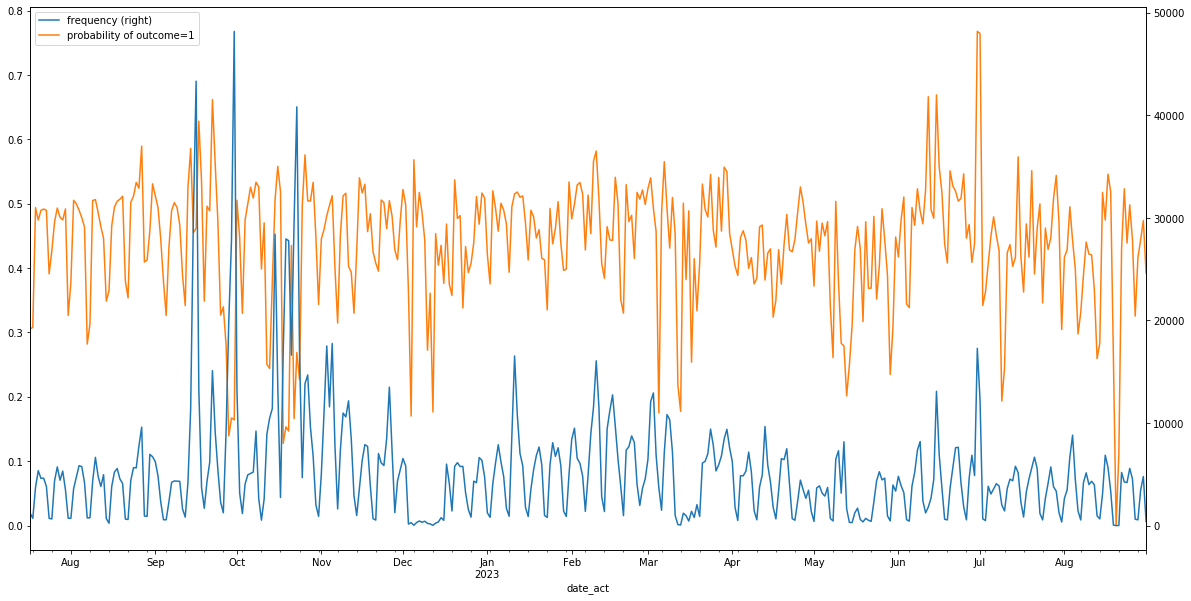

In [14]:
#group the activity by date, and then plot the number of activities as well as the probability of outcome=1 for each date
date_act = pd.DataFrame()
date_act['frequency'] = df.groupby('date_act')['outcome'].size()
date_act['probability of outcome=1'] = df.groupby('date_act')['outcome'].mean()
date_act.plot(secondary_y='frequency', figsize=(20,10))

From the plot we can see that there is a weekly pattern, where on weekends there are much less events, as well as the probability of an event being a '1' class is much lower.

We can see that during the week the classes are pretty balanced at ~0.5 while on weekends they drop to 0.4-0.3.

We can also see some big peaks in number of activities around the September-October time frame.

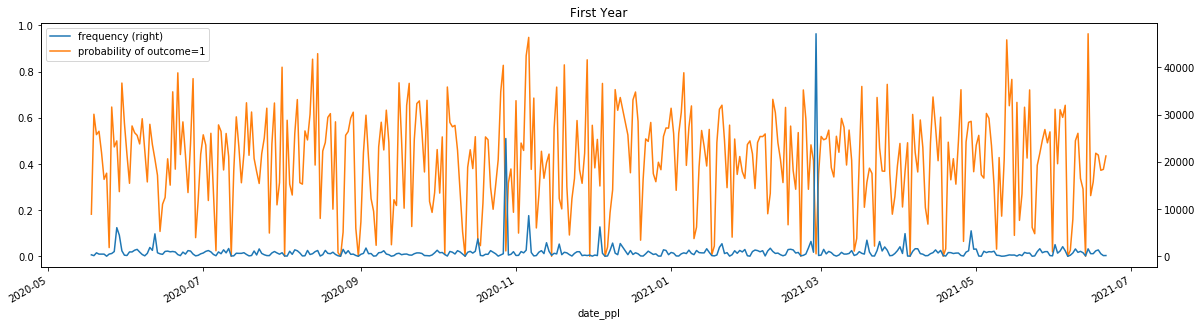

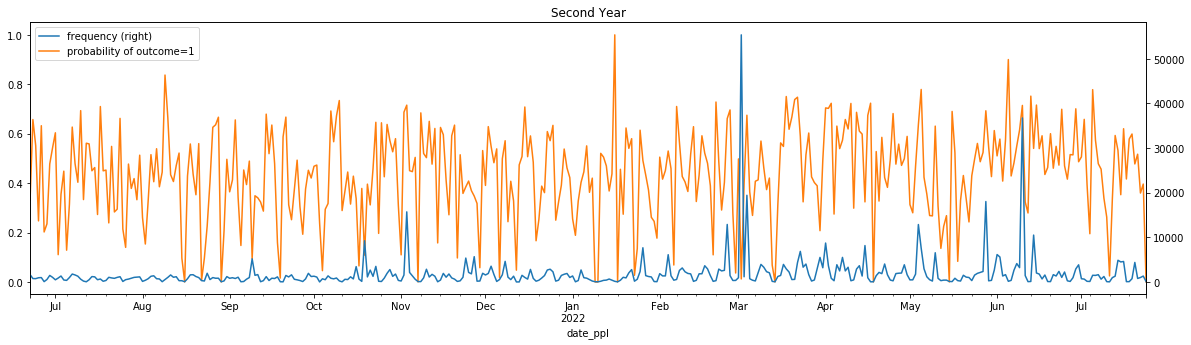

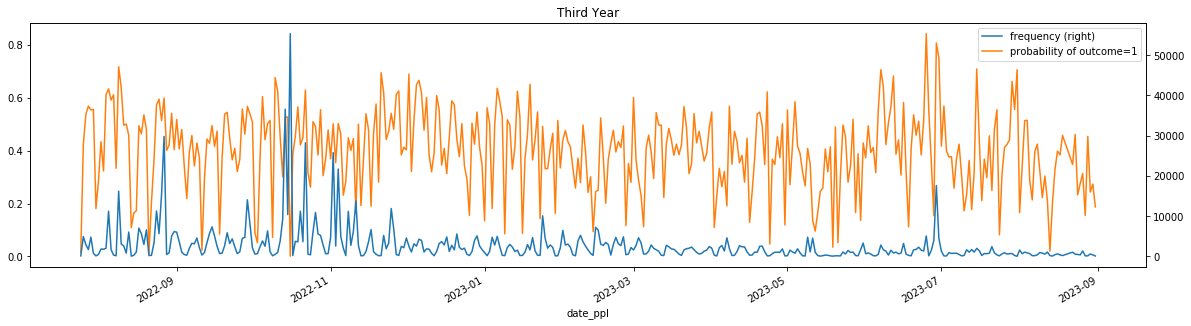

In [19]:
#do the same with the other date feature, date_ppl
#since the time-scale is too long to show well on one graph, We need to split it into multiple time range (ex. each year)
date_ppl = pd.DataFrame()
date_ppl['frequency'] = df.groupby('date_ppl')['outcome'].size()
date_ppl['probability of outcome=1'] = df.groupby('date_ppl')['outcome'].mean()
t = int(len(date_ppl) / 3)
date_ppl[:t].plot(secondary_y='frequency', figsize=(20,5), title='First Year')
date_ppl[t:2*t].plot(secondary_y='frequency', figsize=(20,5), title='Second Year')
date_ppl[2*t:].plot(secondary_y='frequency', figsize=(20,5), title='Third Year')

AS we can see there is a weekly structure to the date_y variable, but it isn't as visible as the previous plot. However, the class probabilities appear to swing much lower (reaching 0.2 on a weekly basis)